In [1]:
import pandas as pd
import numpy as np

In [2]:
#Visualisation Packages
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

In [3]:
#Reading Data In 
''' 
1. Must use r before path

'''
train_df = pd.read_csv(r'C:\Users\Phillip\Desktop\Python\Datasets\train_titanic.csv')
test_df = pd.read_csv(r'C:\Users\Phillip\Desktop\Python\Datasets\test_titanic.csv')

# Exploratory Data Analysis

Target variable is the survived column

In [4]:
#Exploring Dataset
train_df.head()
train_df.shape

#Guess features such as passengerID name and ticket doesn't contribute to survival
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
''' 
Check which columns have missing values and get datatype of each column

1. Use info() not info
2. Use train.describe(include = 'all') 
'''
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# Data Cleaning


In [ ]:
''' 
Total Missing Values and Percentages
    1. Sum all the null elements in a dataframe, then sort it to see which columns have 
        the most missing data
    2. pd.concat([], axis, keys) 
        things to concatate goes in []
        axis=1 is column 
        keys = [], what the columns/rows will be labelled as
'''
total = train_df.isnull().sum().sort_values(ascending=False)
percentage_missing_per_column = (total / train_df.isnull().count()).round(3) * 100 
#Put it into one table using concat, align it as columns using axis = 1
summary_missing_values = pd.concat(
    [total, percentage_missing_per_column], axis = 1,
    keys= ['Total', '% Missing'])

summary_missing_values.head()

,Total,% Missing
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Name,0,0.0


In [ ]:
''' 
Fixing the Easiest first (Embarked has 2 missing datasets)
0. Drop useless columns (axis = 1 or columns)
1. Fill in with most common
2. Fill in Embarked with .fillna('S')
3. Fill in Age with randomly distributed variable (make sure non negative, rounded)
'''
#Below checks and confirms Embarked = S is by far most common
train_df['Embarked'].mode()
train_df[train_df['Embarked'] == 'S'].value_counts()

PassengerId  Survived  Pclass  Name                                                 Sex     Age   SibSp  Parch  Ticket    Fare     Cabin        Embarked
4            1         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)         female  35.0  1      0      113803    53.1000  C123         S           1
7            0         1       McCarthy, Mr. Timothy J                              male    54.0  0      0      17463     51.8625  E46          S           1
11           1         3       Sandstrom, Miss. Marguerite Rut                      female  4.0   1      1      PP 9549   16.7000  G6           S           1
12           1         1       Bonnell, Miss. Elizabeth                             female  58.0  0      0      113783    26.5500  C103         S           1
22           1         2       Beesley, Mr. Lawrence                                male    34.0  0      0      248698    13.0000  D56          S           1
                                                         

In [9]:
#Missing rows given by
train_df[train_df['Embarked'].isnull()]
train_df['Embarked'] = train_df['Embarked'].fillna('S')

#Drop columns 
Columns_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
train_df2 = train_df.drop(Columns_drop, axis = 'columns')
 

In [10]:
#Assume age is randomly distributed
mean_age = train_df2['Age'].mean()
std_age = train_df2['Age'].std()

#Fill by creating vector of random ages
random_ages = abs(
                np.random.normal(mean_age, std_age, size 
                = (train_df['Age'].isnull().sum()))
                ).round(2)

#Take a slice out using copy => fill that one
age_slice = train_df2['Age'].copy()
age_slice[age_slice.isnull()] = random_ages

#Reassign the slice
train_df2['Age'] = age_slice

In [11]:
#Check
train_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


# Now we convert categorical data to integers

We can see from .info() that we have 2 object features => convrt into integers so we can apply ML

Sex is easiest to convert -> M = 0, F = 1
Embarked we create a dictionary key 


In [12]:
''' 
Converting Sex
1. Use df.loc[ row, column ] where row argument is the mask
'''

train_df2.loc[train_df2['Sex'] == 'male', 'Sex'] = 0
train_df2.loc[train_df2['Sex'] == 'female', 'Sex'] = 1


In [13]:
''' 
Use map function, use slice because running this cell twice maps 
it twice which makes everything NaN
'''
embarked_dict = { 'S' : 0, 'C' : 1, 'Q' : 2}
embarked_slice = train_df2['Embarked'].copy
embarked_slice = train_df2['Embarked'].map(embarked_dict)

In [14]:
train_df2['Embarked'] = embarked_slice
train_df2['Embarked'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Embarked
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [15]:
#Final Check
train_df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


# Data Visualisation

Creating functions that can 
    1. Plot % of people who died per CATEGORICAL column
    2. Plot % of people who survived per CATEGORICAL column

def plot_death(x, x_axis, title):

C:\Users\Phillip\AppData\Local\Temp\ipykernel_45164\4082491139.py:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Male' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[x_axis_label] == 0, x_axis_label] = 'Male'
C:\Users\Phillip\AppData\Local\Temp\ipykernel_45164\4082491139.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Cherbourg' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[x_axis_label] == 1, x_axis_label] = "Cherbourg"


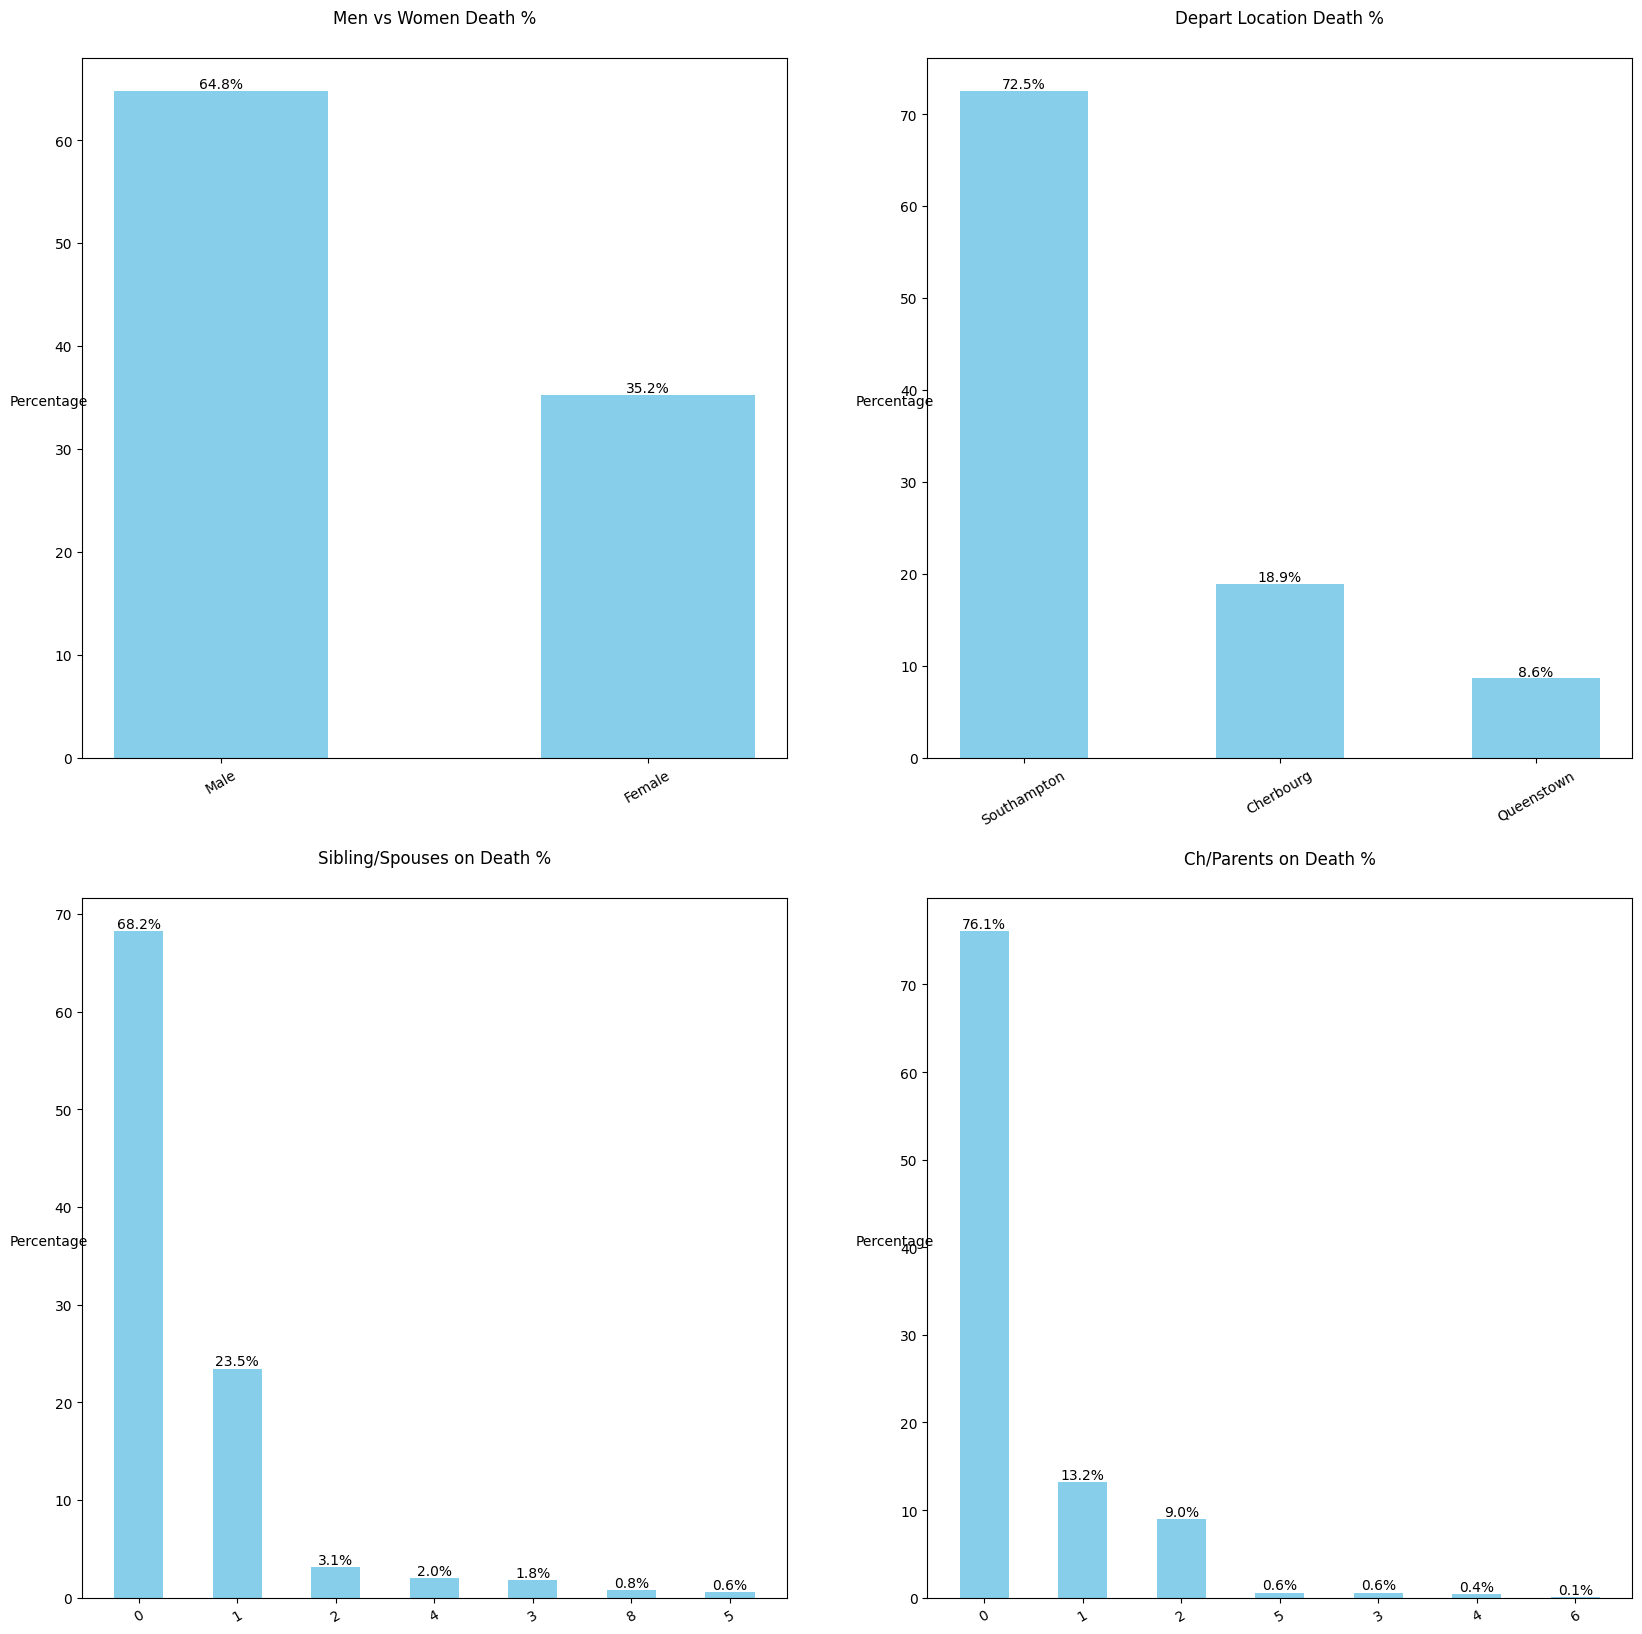

In [16]:
'''
Function explained:
    1. Create new data set to plot % passengers per each categorical variable
        - e.g., number of people who have 1 sibling, 2 sibling, ...
    2. Use value_counts() to get percentage/number of each variable 
        2a. Normalise turns it into a percentage
    3. Use reset_index()
        - Turns series into dataframe 
        - Takes (multi-level) indexes and puts it as its own column
    4. Use .rename(columns = {'old column name' : 'new column name'})

Plotting 
    1. Prepare data
        - ax.bar(number of classes, height per class, width, color)
        - no. of classes and height per class must be same size array
    2. Format axis
    -   ticks, ticks label for x,y axis 
    -   % label for each bar -> for loop iterate over ax object then use ax.text()
            - set x-axis position using get_x() and get_width()
            - set y-axis using get_height()
            - number to display also use get_height()
            - set alignment, ha= , va= 
'''

def plot_count(ax, x, x_axis_label, title, width = 3, height = 2):
 
    df = train_df2[x].value_counts(normalize=True) * 100
    df = df.reset_index().rename(columns ={x : x_axis_label, 'proportion': 'Percentage'})

    #Change back into string
    if x == 'Sex':
        df.loc[df[x_axis_label] == 0, x_axis_label] = 'Male'
        df.loc[df[x_axis_label] == 1, x_axis_label] = 'Female'
    elif x == "Embarked":
        df.loc[df[x_axis_label] == 1, x_axis_label] = "Cherbourg"
        df.loc[df[x_axis_label] == 2, x_axis_label] = "Queenstown"
        df.loc[df[x_axis_label] == 0, x_axis_label] = "Southampton"
    elif x == 'Survived':
        df.loc[df[x_axis_label] == 0, x_axis_label] = "No"
        df.loc[df[x_axis_label] == 1, x_axis_label] = "Yes"
        
    #Prepare data for bar chart
    categories = df[x_axis_label].values
    percentages = df['Percentage'].values

    #Configure axis
    bars = ax.bar( x = np.arange(len(categories))
                    , height=percentages, width = .5, color='skyblue')
    #Make 2 ticks
    ax.set_xticks(np.arange(len(categories)))
    ax.set_xticklabels(categories, rotation = 30)
    ax.set_xlabel = x_axis_label

    ax.set_ylabel('Percentage', rotation = 0)
    ax.set_title(title + '\n', pad=10)

    #Add label for each bars => iterate over the axes object
    for bar in bars:
        height = bar.get_height().round(1) # Get % for each bar
        ax.text(
            bar.get_x() + bar.get_width()/2, 
            height, 
            f'{height}%',
            va='bottom', ha='center' 
        )

''' 
Matplotlib creates a figure and axes object 
    - Figure is the frame that everything goes in
    - Axes (if there are more than 1) is a matrix of different axies
    - Use numpy's .ravel() to flatten into 1D array so we can assign it
    - Pass ax1 argument into function, assign things to it
'''
# subplot arguments are nrows, ncols
#BE CAREFUL YOU USE plt.subplotS not plt.subplot (different functions)
fig, axes = plt.subplots( 2,2, figsize= (20,20))
ax1, ax2, ax3, ax4 = axes.ravel()

#Calling Functions
plot_count(ax1, 'Sex', 'Gender', 'Men vs Women Death %')
plot_count(ax2, 'Embarked', 'Port of Dep', 'Depart Location Death %')
plot_count(ax3, 'SibSp', 'Number of Siblings/Spouses', 'Sibling/Spouses on Death %')
plot_count(ax4, 'Parch', 'Number of Ch/Parents', 'Ch/Parents on Death %')


C:\Users\Phillip\AppData\Local\Temp\ipykernel_45164\3576092816.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'male' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df1.loc[df1[x_axis_label] == 0, x_axis_label] = "male"
C:\Users\Phillip\AppData\Local\Temp\ipykernel_45164\3576092816.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(categories, rotation = 30)
C:\Users\Phillip\AppData\Local\Temp\ipykernel_45164\3576092816.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Cherbourg' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df1.loc[df1[x_axis_label] == 1, x_axis_label] = "Cherbourg"
C:\Users\Phillip\AppData\Local\Temp\ipykernel_

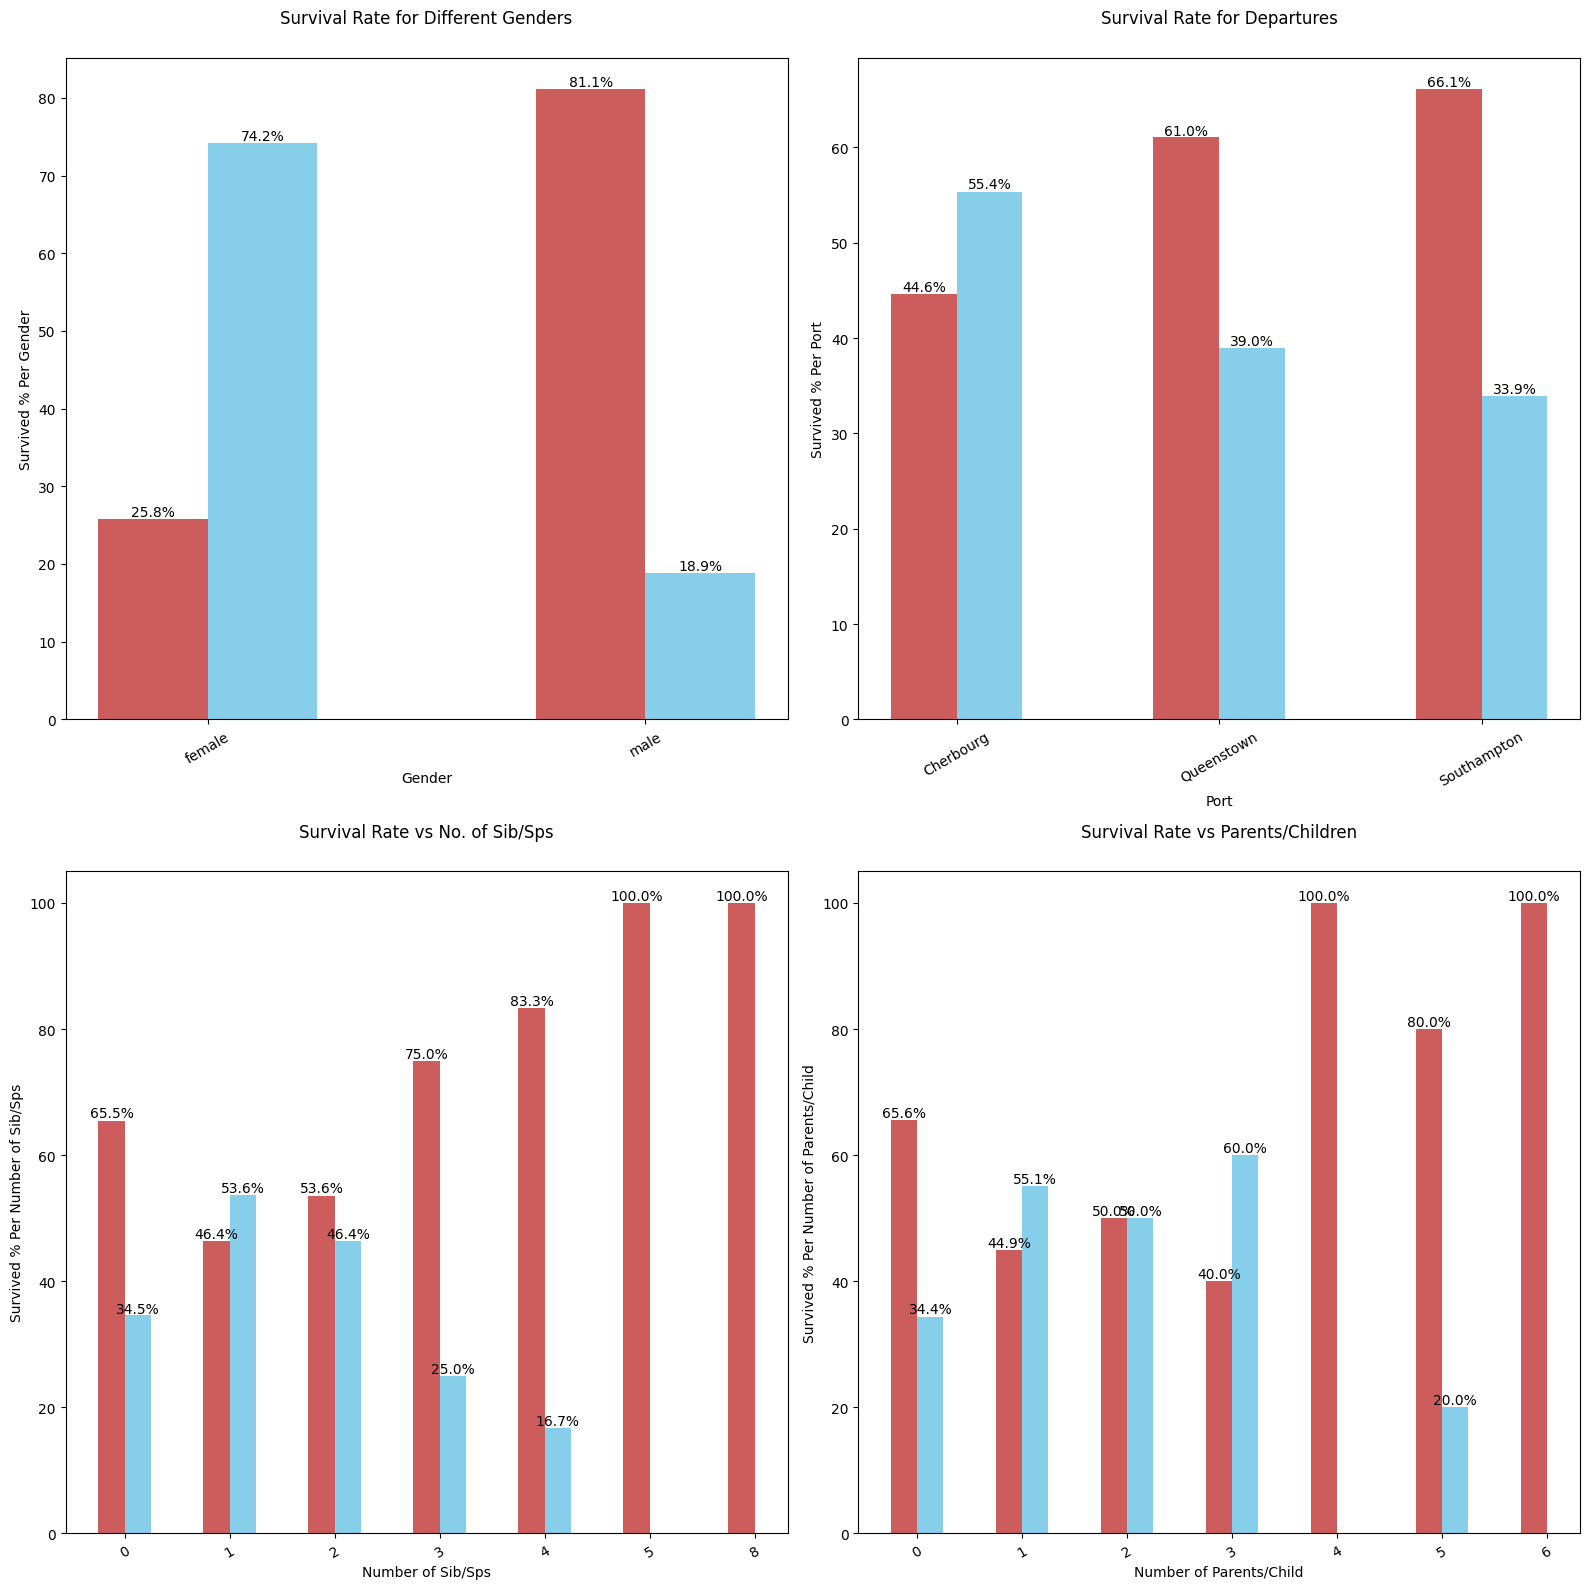

In [17]:
''' 
    Use grouby(x) to group deaths/survivals by each sex
        - Use value_counts to get percentages
        - Turn it into a table we can plot from using rename and reset index
'''

''' 
df.pivot => reshapes data from 'long' format to 'wide' format
    - Pick 2 columns from original DF to be row, column 
    - Values are drawn from a 3rd column that corresponds to that row/column combo
'''
def plot_survived_percentage(ax, x, x_axis_label, title, width = 3, height = 2):

    # Group and compute percentages indexed by (x, Survived)
    df1 = train_df2.groupby(x)['Survived'].value_counts(normalize=True) * 100

    # Convert from a multi-indexed series to a dataframe with column labels we want
    df1 = df1.reset_index().rename(
            columns={x : x_axis_label, 'proportion' : 'Survived %'})
    
    if x == 'Sex':
        df1.loc[df1[x_axis_label] == 0, x_axis_label] = "male"
        df1.loc[df1[x_axis_label] == 1, x_axis_label] = "female"
    elif x == "Embarked":
        df1.loc[df1[x_axis_label] == 1, x_axis_label] = "Cherbourg"
        df1.loc[df1[x_axis_label] == 2, x_axis_label] = "Queenstown"
        df1.loc[df1[x_axis_label] == 0, x_axis_label] = "Southampton"


    #Pivot - so we can align the categorical labels with the data in the plot
    df1_pivot = df1.pivot(index = x_axis_label, columns='Survived', values='Survived %')

    #Get category names into a list 
    categories = df1_pivot.index.to_list()
    category_count = len(categories)

    #Prepare for 2-bar per column plot
    width_per_bar = 0.25
    
    #Plot: this takes care of any number of categories
    bars_dead = ax.bar(
        np.arange(category_count) - width_per_bar/2,
        height = df1_pivot[0], color='indianred', width = width_per_bar, label ='Dead')
    
    bars_survived = ax.bar(
        np.arange(category_count) + width_per_bar/2, 
        height = df1_pivot[1], color = 'skyblue', width = width_per_bar, label = 'Alive')

    # Labels => use ax.set_xlabel() not ax.set_label = ...
    # latter overwrites the method
    ax.set_xlabel(x_axis_label)
    ax.set_xticklabels(categories, rotation = 30)
    ax.set_xticks(np.arange(category_count))
    
    #Titles and Labels
    ax.set_ylabel(f'Survived % Per {x_axis_label}')
    ax.set_title(title + '\n', pad = 10)

    ''' 
    Annotation of % => Loops across each bar to label it with its own height
        - Loop across dead vs alive
        - Loop across each bar in dead (then alive)
    '''
    for bar_group in (bars_dead, bars_survived):
        for bar in bar_group:
            height = bar.get_height().round(1)
            ax.text(
                bar.get_x() + bar.get_width()/2, #Text: center position of bar
                height, #Text: y-position
                f'{height}%', #Puts the height and adds a decimal point + %
                ha='center', va='bottom' #Hortiz/Vertical Alignment
            )
    

fig2, ax2_= plt.subplots(2,2, figsize=(16,16))
ax2_1, ax2_2, ax2_3, ax2_4 = ax2_.ravel()
plot_survived_percentage(ax2_1, x='Sex', x_axis_label='Gender', title='Survival Rate for Different Genders')
plot_survived_percentage(ax2_2, x='Embarked', x_axis_label='Port', title='Survival Rate for Departures')
plot_survived_percentage(ax2_3, x='SibSp', x_axis_label= 'Number of Sib/Sps', title = 'Survival Rate vs No. of Sib/Sps')
plot_survived_percentage(ax2_4, x='Parch', x_axis_label= 'Number of Parents/Child', title = 'Survival Rate vs Parents/Children')

plt.tight_layout()
plt.show()

# Creating Categories for Continous Variables

Will bin ages into categories as it is a continous variable
    - Plot histogram

<Axes: xlabel='Ages'>

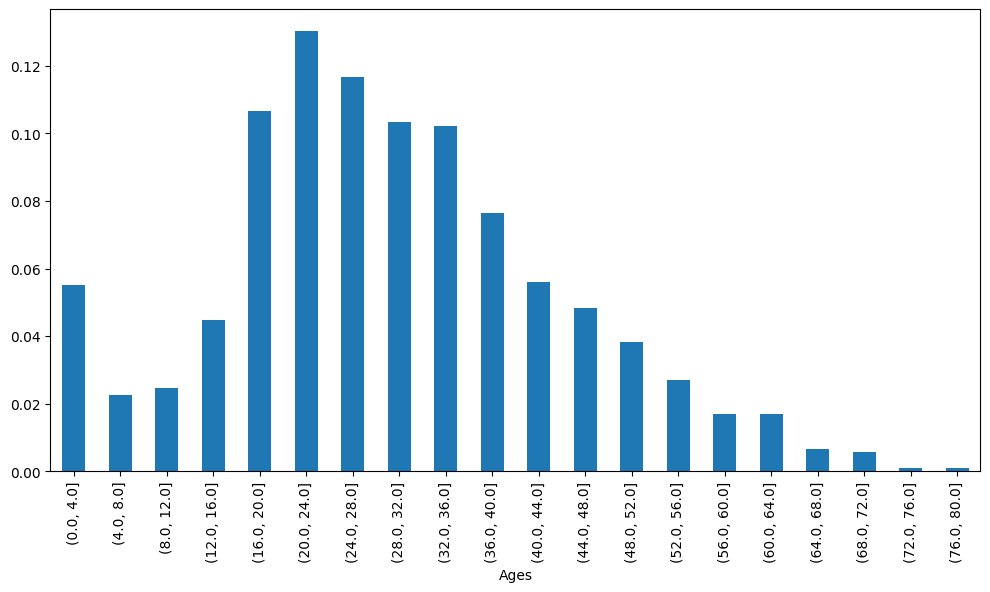

In [18]:
''' 
Create bins based on ranges of ages in the data set
    - Use pd.interval_range(min, max, periods, freq)
    - Freq : length of each interval (set age interval)
    - Periods : number of periods to generate (number of buckets)
Value Counts
    - bins = how you want to split up chunks of the X axis
    - sort = default is True, this orders the X axis
    - ascending = how the X-axis is sorted 
    - dropna = default is True, just drops rows that has NA values
Pandas Direct Plot : pd.Dataframe.plot.bar( x, y, color)
    - x : default plots index of dataframe
    - y : default plots all numerical columns 
    - title, xticks, yticks, xlim, ylim, xlabel, legend, figsize, layout, sharex, sharey

'''
bins = pd.interval_range(train_df2['Age'].round().min(), train_df2['Age'].round().max(), periods=20)
train_df2['Age'].value_counts(normalize=True, bins = bins, sort=False).plot.bar(figsize=(12,6), xlabel = 'Ages')



In [19]:
''' 
We want to reflect that there are a small number of people older than 50, majority
between 16-44, and some children under 16

Use pd.cut to turn continous variables into categorical
    - pd.cut( x, bins, labels, include_lowest = False, right= True)
    - x : this is the data we want to bin. Must be 1D array
    - bins : if we input a scalar => it creates that many equally sized bins
        - if we put a list of scalars => defines bin edges (non uniformal width)
        - if we use an intervalindex => defines exact bins

    - labels : This is how the binned data will be described e.g., will give the
      the interval range if there is no label. If there is a label, it would be 
      e.g., 1 instead of (0, 4)
        - must be same size as bins. Labels corresponding bin data
        - useful to do integers which we can than map over
    - right : indicates whether bins include rightmost edge or not

'''

train_df2['Age_Categories'] = pd.cut(train_df2['Age'], 
                    bins = [0, 11, 18, 23, 27, 33, 40, 50, np.inf],
                    labels=[0,1,2,3,4,5,6,7],
                    include_lowest= True, right = False
                    ).astype(int) #Ensures the dtype is integer not category

age_labels_dict = { 1 : '0-10', 2 : '11-18', 3 : '19-22', 4 : '23-26', 5: '33-39',
                   6 : '40-49', 7: '50+'}


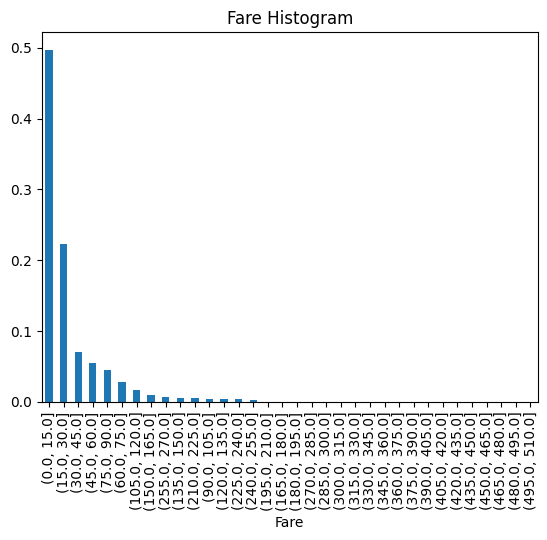

In [20]:
#Splitting up Fare into Categorical Groups as well

fare_bins = pd.interval_range(train_df2['Fare'].round().min(), train_df2['Fare'].round().max(), freq = 15)
train_df2['Fare'].value_counts(normalize=True, bins = fare_bins).plot.bar(
    xlabel = 'Fare', title = 'Fare Histogram')

#Most fares concentrated between $0-30, and most are below $100. Some outliers exist above $100

fare_dict = { 0: '0-7.99', 1: '8-13.99', 2: '14-30.99', 3: '31-98.99', 4: '99-249.99', 5: '>=250}'}

train_df2['Fare_Categories'] = pd.cut(train_df2['Fare'], bins = [0,8,14,31,99,250, np.inf],
                                      labels = [0,1,2,3,4,5], include_lowest = True, right=False
                                      ).astype(int)

train_df2['Fare_Categories_Text'] = train_df2['Fare_Categories'].map(fare_dict)

KeyError: 'Age_Categories_text'

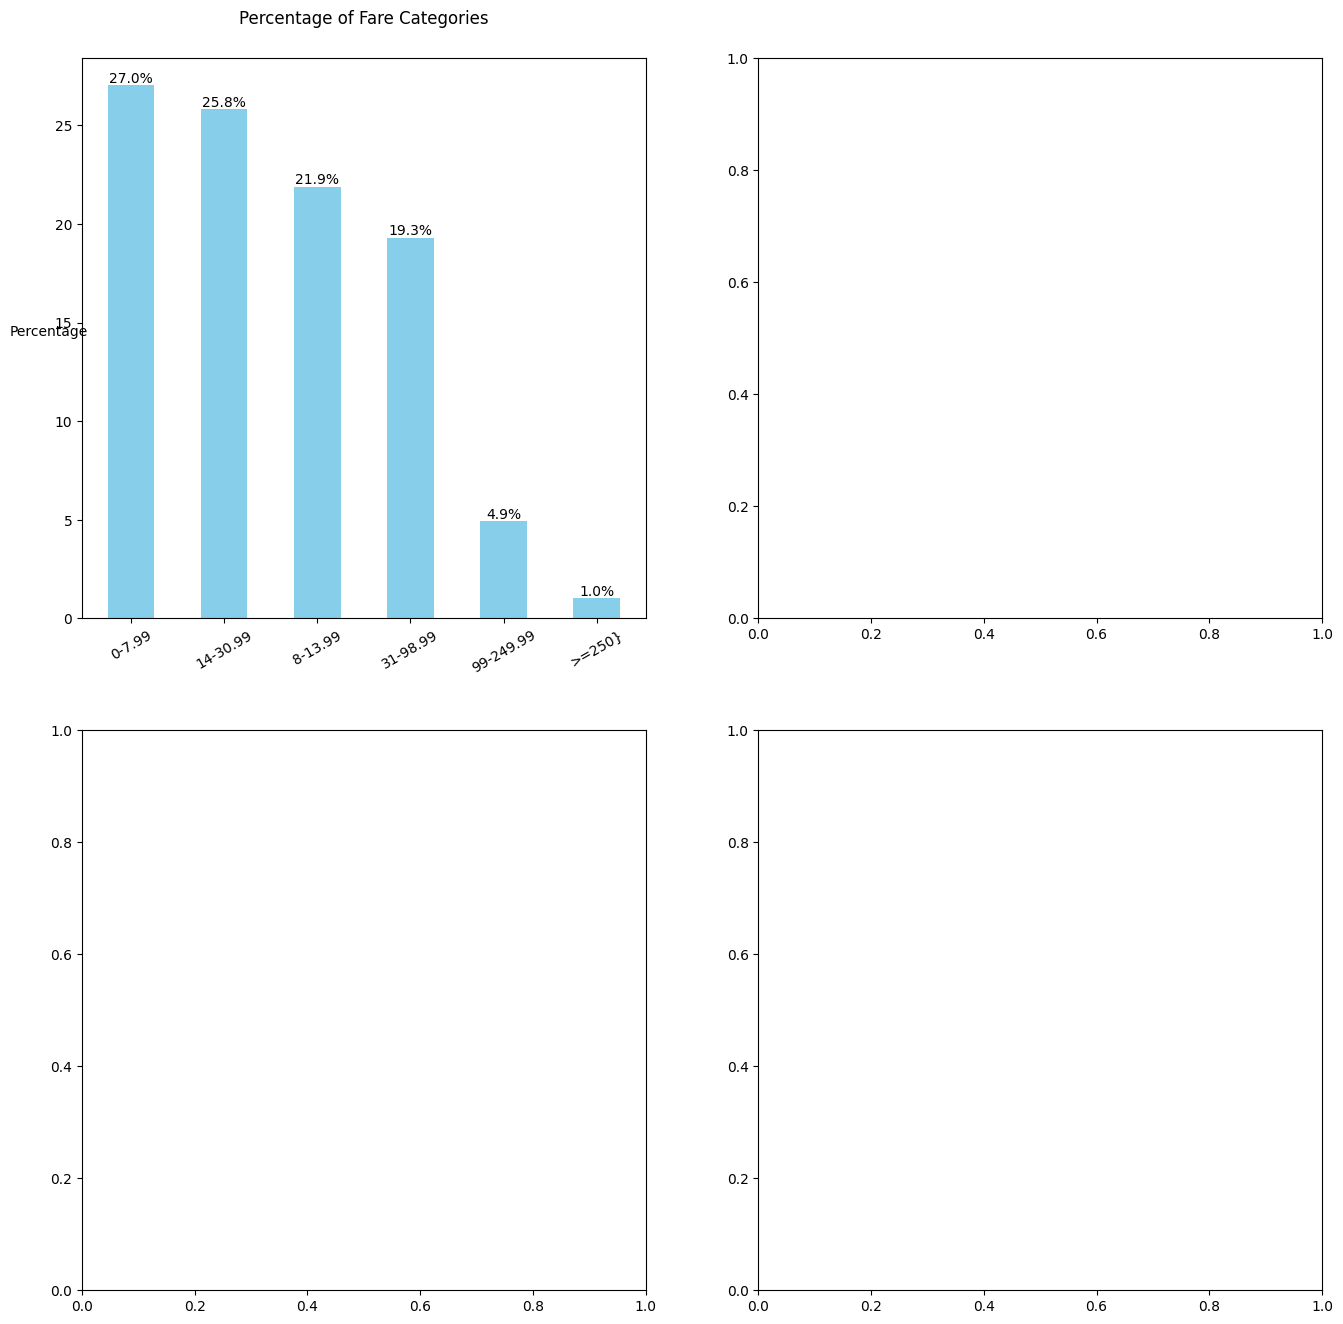

In [21]:
#Analysis
fig, axs = plt.subplots(2,2, figsize = (16, 16))
ax1, ax2, ax3, ax4 = axs.ravel()
plot_count(ax1, 'Fare_Categories_Text', 'Fare Categorisation', 'Percentage of Fare Categories')
plot_count(ax2, 'Age_Categories_text', 'Age Groups', 'Percentage of Age Categories')
plot_survived_percentage(ax3, 'Fare_Categories_Text', 'Fare Categories', title = 'Survival % per Fare Category')
plot_survived_percentage(ax4, 'Age_Categories_text', 'Age Groups', title = 'Survival % per Age Group')

# Correlation Matrix

Apply intuition when looking at correlation e.g., fare paid and passenger class should be very linked

Look at correlations of features with the target variable e.g.,

    - Highest correlation explantory variable with target variable (Survived) is gender with 
      positive corr = 0.54
    - Negative correlation for passenger class with target variable = - 0.34 etc
    - Low correlations e.g., Age, SibSp, Parch < 0.1 

Also look at where other high correlations exist between explantory variables

    - Number of siblings/spouses and children = 0.41

In [ ]:
''' 
Plotting heatmap of the covariance structure in our data

'''
#Select Data we want covariance/correlations of
X = train_df2[['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Age_Categories', 'Fare_Categories']]

#Method 1 : Doing it from Scratch => Remember to divide by N and issues with numpy/df (e.g., reshape)

X_bar = np.array(X.mean()).reshape(8,1)
X_barr = X_bar @ X_bar.T
Covariance = (X.T @ X ) / (X.shape[0] - 1) - X_barr
#Method 2 : Using Pandas

Covariance2 = X.cov(ddof = 0)
Correlation2 = X.corr(method = 'pearson')

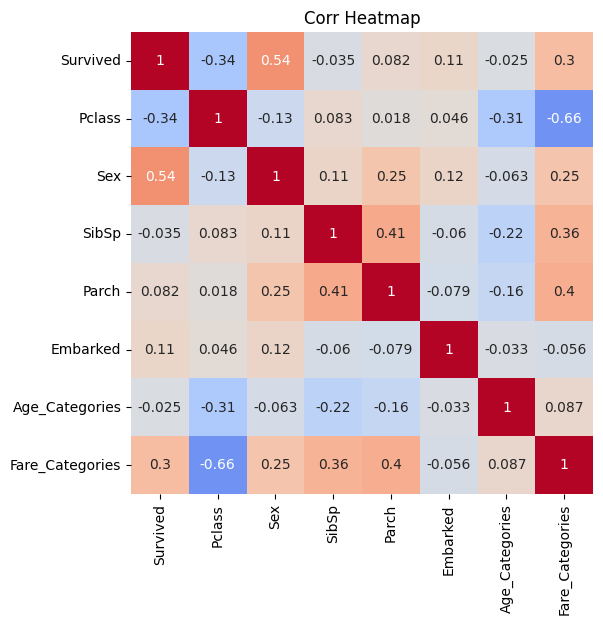

In [ ]:
''' 
Seaborn heatmap : sns.heatmap( data, annot, cmap, vmin, vmax, fmt, square, cbar)
    - data : 2D array 
    - annot : whether to put values in each box
    - cmap : colormap
    - vmin/vmax : max or min value for color scale
    - fmt : formatting for annotation text => '%.2g' means 2 sig fig
    - cbar = color bar legend 
'''

#Plot using Seaborn

fig, axs = plt.subplots(figsize=(12,6))
sns.heatmap(Correlation2, annot=True, cmap='coolwarm', vmin = -1, vmax = 1, fmt= '.2g',
            square = True, cbar = False)
plt.title('Corr Heatmap')
plt.show()

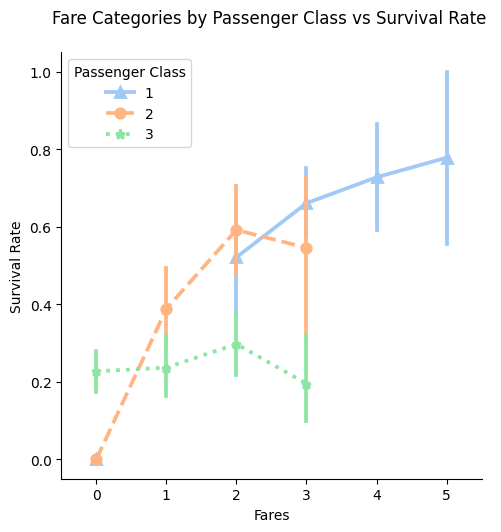

In [ ]:
''' 
Use Seaborn's categorical plotting function :
    
    sns.catplot( data, x, y, hue, col, 
        size, ax, jitter, native_scale, order, split, palette, edgecolor)

    - Data : dataframe
    - x : categorical variable column name
    - y : target variable column name
    - kind : default in catplot() is scatterplot/stripplot()
    - hue : categorical variable column name => another way of adding a dimension.
            Different catplot functions handle this differently
    - col : another way to add dimension of data (creates another plot in same axis)

    - ax : which axis the plot should be on e.g., ax = g.ax if g is our seaborn object
    - jitter : magnitude/disable of whether we want data to look 'jittered' around one category
    - native_scale: True/False => Keeps the scale from underlying data
                    e.g., if True will keep categories with 0 data
    - order: how categories appear on plot e.g., order=['Brother', 'Sister', 'Mother'] : 

Seaborn has 3 categorical plot families

    1. Scatterplots

        - stripplot() or kind = 'strip'
        - swarmplot or kind = 'swarm'

    2. Distribution Plots
    
        - boxplot() , 'box'
        - violinplot(), 'violin' => combines boxplot with KDE procedure 
            - Split : Makes more space efficient if True

        - boxenplot(), 'boxen' => Shows distribution of data (similar to boxplot)

        Hue : Adds more box for same categorical variable (makes each box narrower to fit)

    3. Estimate Plots => Bootstraps/Takes mean values to obtain estimate and confidence
                         interval shown via error bars
        
        - pointplot(), 'point' 
        - barplot(), 'bar' 
        - countplot(), 'count' : Encodes value of estimate with height on Y-axis, but doesn't show
                                 full bar. Plots point estimate and conf interval. 
                                 Connects points from same hue 
            - markers = ["^", "o"]
            - linestyles = ["-", "--"]

        - error_bar=('pi', 95) : Control error bar representations/confidence interval levels
'''

g = sns.catplot(data=train_df2, x='Fare_Categories', y='Survived', kind='point',
            hue ='Pclass', markers=["^", "o","*"], linestyles =["-","--",":"],
            palette='pastel')

#Title & Axis
g.set(title ='Fare Categories by Passenger Class vs Survival Rate \n',
      xlabel='Fares', ylabel = 'Survival Rate')
#Rename Legend
g._legend.remove()
g.ax.legend().set_title('Passenger Class')

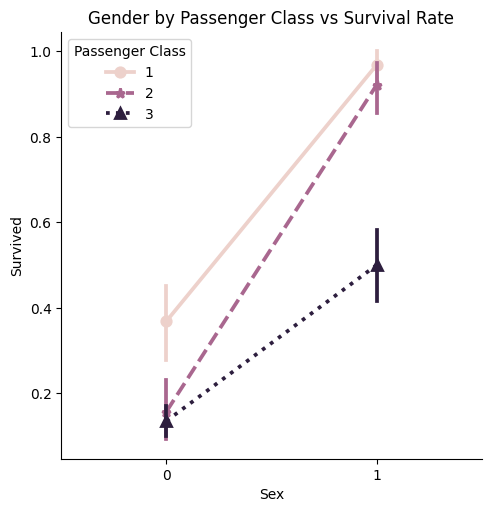

In [ ]:
#Plotting Gender, Passenger Class vs Survival Rate 
gender_per_pClass = sns.catplot(data=train_df2, x='Sex', y='Survived', hue='Pclass', kind='point'
                                ,markers=["o", "*","^"], linestyles=["-","--",":"]
                                )
gender_per_pClass.set(title='Gender by Passenger Class vs Survival Rate')
gender_per_pClass._legend.remove()
gender_per_pClass.ax.legend().set_title('Passenger Class')

In [ ]:
#Plotting Gender, PClass, Embarked vs Survived

#Create string column for Embarked
Embarked_dict = {0 : 'Southhampton', 1: 'Queenstown', 2:'Cherbourg'}
train_df2['Embarked_Text'] = train_df2['Embarked'].map(Embarked_dict)



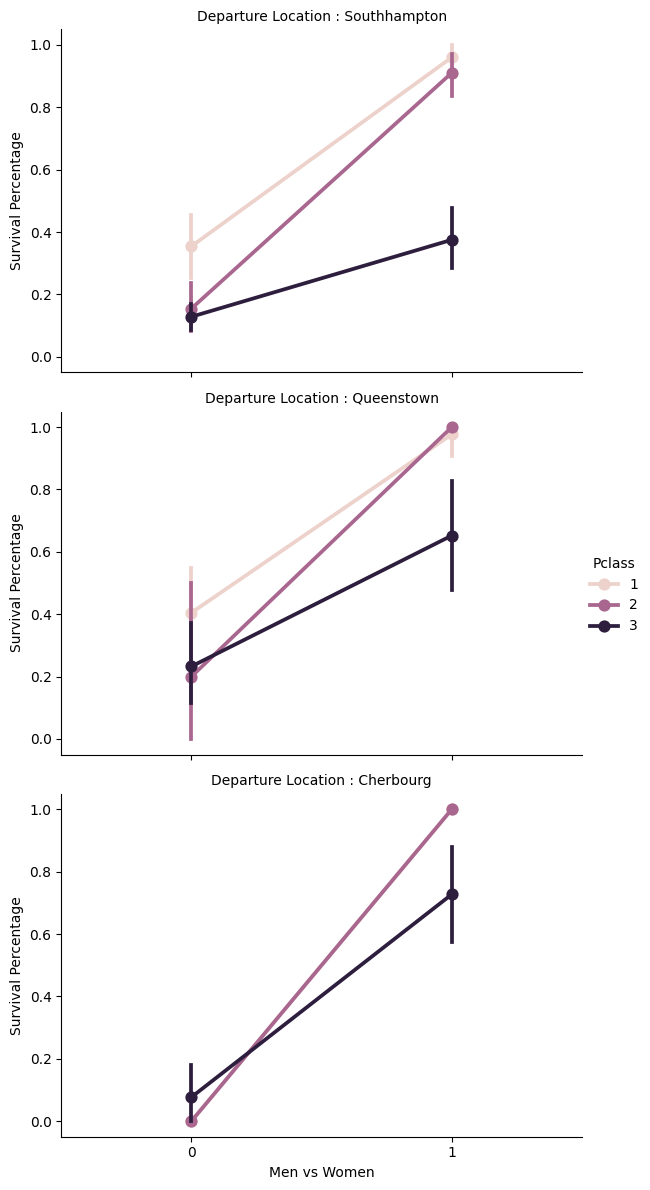

In [ ]:
g = sns.catplot(data=train_df2, x='Sex', y='Survived', hue='Pclass', row='Embarked_Text',
                kind = 'point', height = 4, aspect = 1.5)
g.set_axis_labels(x_var = 'Men vs Women', y_var = 'Survival Percentage')
g.set_titles(row_template = 'Departure Location : {row_name}')
